## **Trabajo Práctico Individual n° 1: Exploratory Data Analysis**
____
__Universidad Tecnológica Nacional, Buenos Aires__\
__Ingeniería Industrial__\
__Ciencia de Datos - Curso I5521__
____

- Nombre:Santiago
- Apellido:Vicentela
- Legajo:1729093

En este trabajo práctico aplicaremos algunas técnicas aprendidas para el análisis exploratorio de datos.

Este conjunto de datos procede del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo del conjunto de datos es predecir de forma diagnóstica si un paciente tiene o no diabetes, basándose en determinadas mediciones diagnósticas incluidas en el conjunto de datos. La selección de estas instancias de una base de datos más amplia está sujeta a varias restricciones como por ejemplo se trata de pacientes mujeres.

Los conjuntos de datos constan de varias variables médicas predictoras y una variable objetivo, el resultado. Las variables predictoras incluyen el número de embarazos que ha tenido la paciente, su IMC, su nivel de insulina, su edad, etc.

#### Variables:
- Pregnancies: Número de embarazos
- Glucose: Concentración de glucosa en plasma a las 2 horas en una prueba de tolerancia a la glucosa oral
- BloodPressure: Presión arterial diastólica (mm Hg)
- SkinThickness: Espesor del pliegue cutáneo del tríceps (mm)
- Insulin: Insulina sérica de 2 horas (mu U/ml)
- BMI: Índice de masa corporal (peso en kg/(altura en m)^2)
- DiabetesPedigreeFunction: Función del pedigrí de la diabetes
- Age: Edad (años)
- Outcome: Variable de clase (0 o 1) 1 para personas diabéticas, 0 para las que no lo son.

## **Objetivos del trabajo practico**
- resolver los requisitos que se detallan en las proximas celdas
- dejar comentarios # en cada linea de codigo que se agregue

In [45]:
## Importo librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings("ignore")

##### **Objetivo 1**
Lo primero que deberan hacer será importar
- el dataset
- corroborar que lo hayamos cargado correctamente.

In [46]:
#Importo el CSV y reviso que se haya importado bien

ruta_arhivo=r"C:\Users\SANTIAGO\Downloads\ClusterAI_TP_dataset_diabetes_.csv"
df_diabetes = pd.read_csv(ruta_arhivo)
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##### **Objetivo 2**
Ahora imprimir también las dimensiones del dataset

In [47]:
#Visualizo las dimenciones del DataFrame

print("\nDimensiones del dataset (filas, columnas):")
print(df_diabetes.shape)


Dimensiones del dataset (filas, columnas):
(768, 9)


##### **Objetivo 3**
Mostrar los nombres de cada columna, el tipo de dato que contiene cada una de ellas y la cantidad de nulos presentes.

In [48]:
#Utilizo el metodo .info () para saber el tipo de dato / si tiene nulos y la cantidad de datos .Todo esto por feature ( variable)
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


##### **Objetivo 4**
Mostrar como se distribuye la variable "Outcome".

   Valor  Cantidad  Porcentaje (%)
0      0       500       65.104167
1      1       268       34.895833


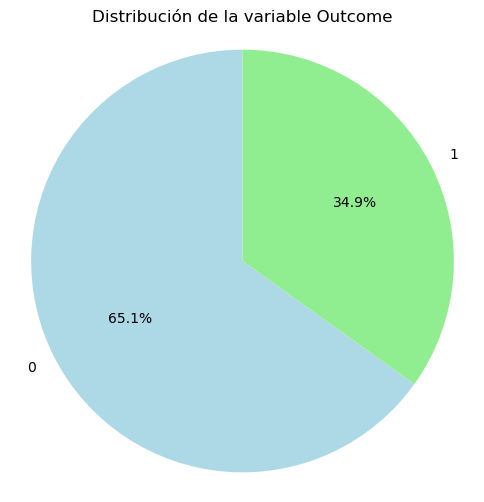

In [100]:
# Obtengo las cantidades y los porcentajes con estas 2 variables 

outcome_counts = df_diabetes['Outcome'].value_counts()
outcome_percentage = df_diabetes['Outcome'].value_counts(normalize=True) * 100

# Creo un DataFrame para visualizar mejor el Valor / Cantidades / Porcentajes 
outcome_distribution = pd.DataFrame({
    'Valor': outcome_counts.index,
    'Cantidad': outcome_counts.values,
    'Porcentaje (%)': outcome_percentage.values
})


# Muestro el DataFrame en este print
print(outcome_distribution)



# Creo el gráfico de torta para visualizarlo 
plt.figure(figsize=(6, 6))

#Configuro el grafico  
plt.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('Distribución de la variable Outcome')
plt.axis('equal')
plt.show()

##### **Objetivo 5**
Obtener algunas métricas estadísticas de todas las variables numéricas del dataset por ejemplo, media, maximo, minimo, desvio estandar entre otros.

In [102]:
#Guardo las metricas en una variable , para sacar las metricas uso el metodo describe()
estadisticas_numericas = df_diabetes.describe()

# Transponer el DataFrame para que cada variable sea una fila
estadisticas_numericas = estadisticas_numericas.transpose()

# Renombrar las columnas para que se entienda mejor 
estadisticas_numericas.columns = [
    'Conteo', 'Media', 'Desviación Estándar', 'Mínimo', '25%', 'Mediana (50%)', '75%', 'Máximo'
]


#Muestro el resultado en pantalla 
estadisticas_numericas



,Conteo,Media,Desviación Estándar,Mínimo,25%,Mediana (50%),75%,Máximo
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


##### **Objetivo 6**
Imprimir un pairplot del dataframe en función de la variable "Outcome". Podemos sacar alguna rápida conclusión de lo observado? Cuál?

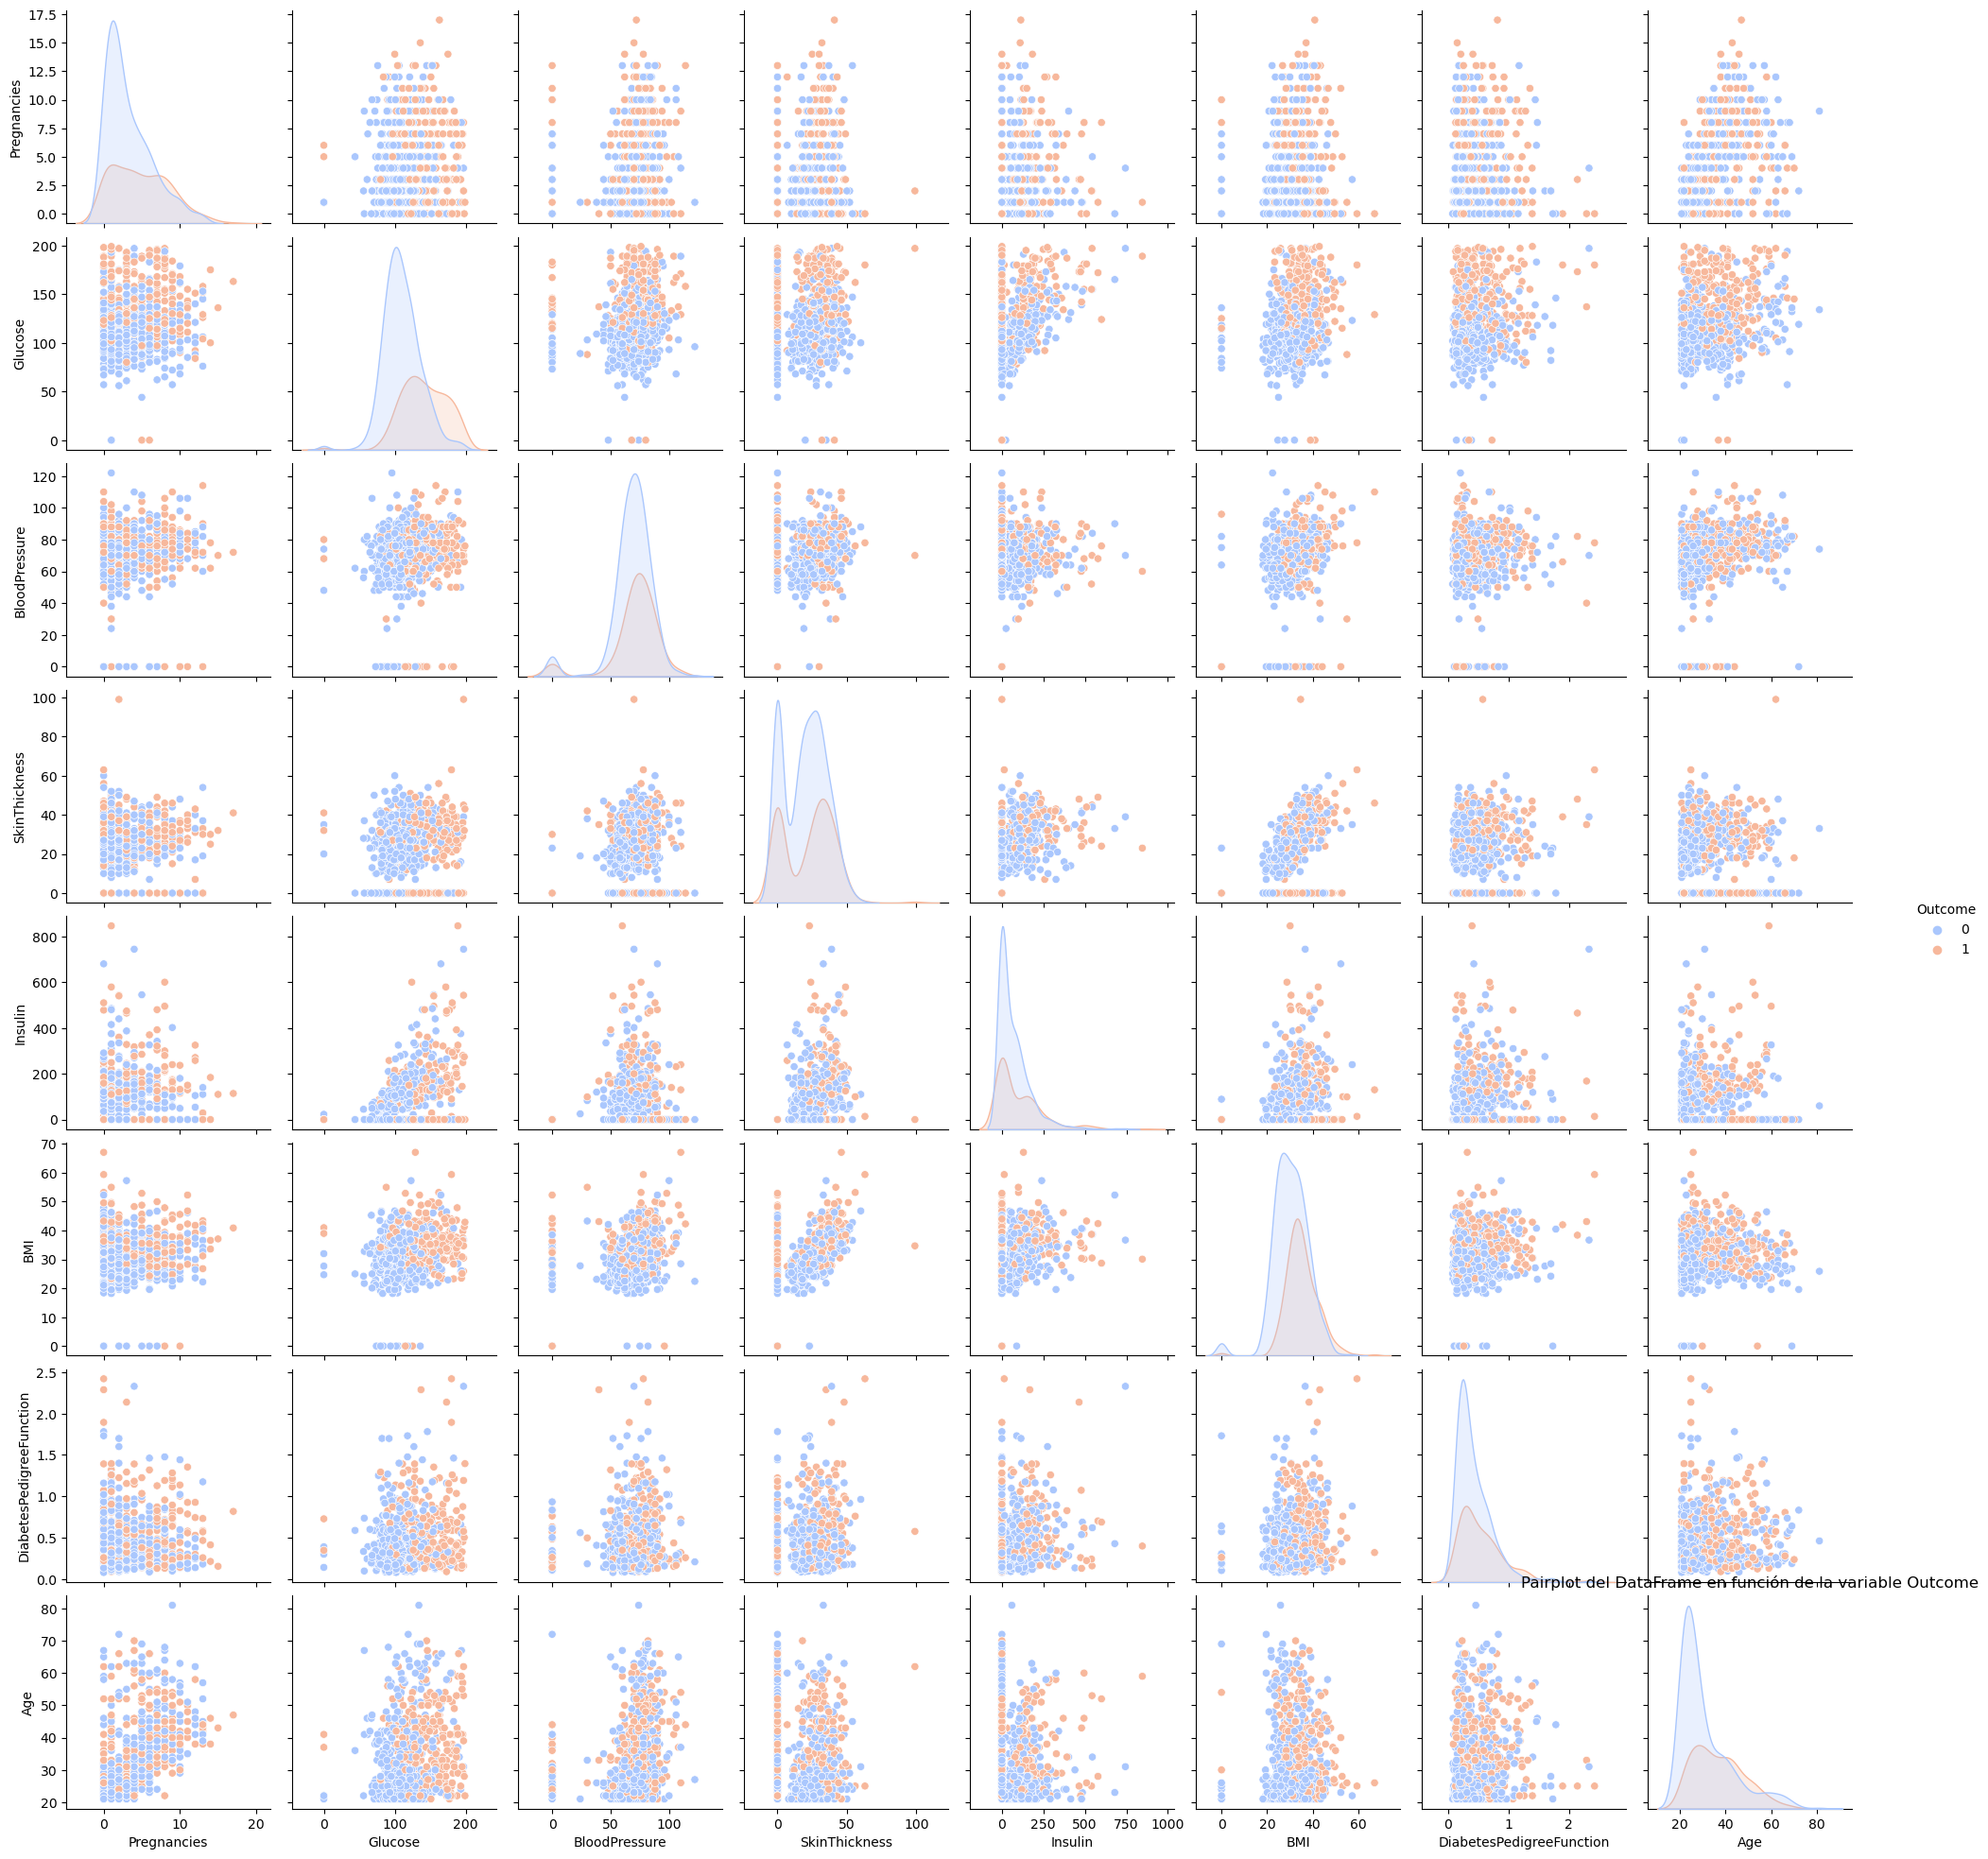

In [88]:
# Creo el pairplot en función de la variable 'Outcome'
sns.pairplot(df_diabetes, hue='Outcome', palette='coolwarm')

# Mostrar el gráfico
plt.title('Pairplot del DataFrame en función de la variable Outcome')
plt.show()


Conclusion:

A partir del análisis gráfico, se observa que las clases Outcome 0 (no diabéticos) y Outcome 1 (diabéticos) están
claramente diferenciadas para cada característica del DataFrame. A pesar de la presencia de outliers, existe una distinción clara entre los dos grupos en función de las variables analizadas. Esto indica que las características del DataFrame son realemnte efectivas para distinguir entre pacientes diabéticos(1) y no diabéticos(0), sugiriendo que en general los datos proporcionan una buena capacidad predictiva para separar los dos grupos.


##### **Objetivo 7**

Analizar la correlación lineal de las variables.

- Cuales son los dos pares de variables más correlaciondas?
- Que valor y tipo de correlación tienen?
- Podríamos tomar alguna decisión con respecto a esto? Cuál?

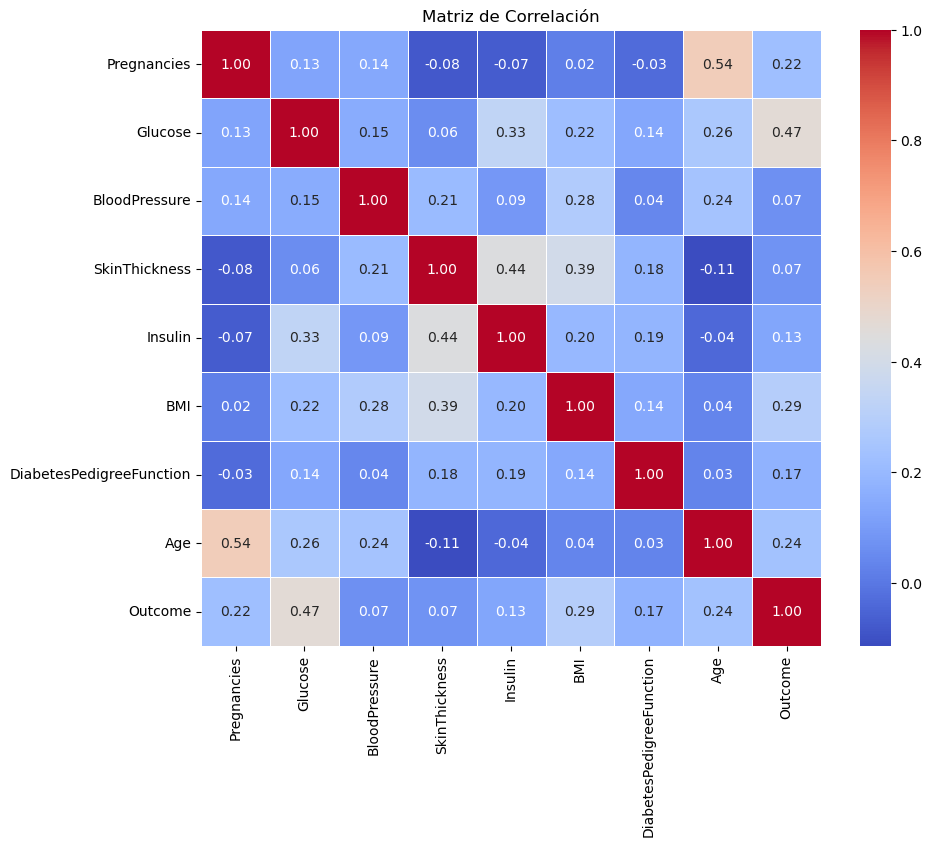

Las dos variables más correlacionadas son: ('Pregnancies', 'Age') con una correlación de 0.54


In [104]:
# Calcular la matriz de correlación(Lineal)
correlation_matrix = df_diabetes.corr()


# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


# Obtengo las correlaciones absolutas, excluyendo la diagonal para saber cuales son las variables mas correlacionadas sin importar el signo 
corr_abs = correlation_matrix.abs()
np.fill_diagonal(corr_abs.values, 0)


# Encuentro el par de variables mas correlacionadas y lo muestro por consola 
max_corr = corr_abs.unstack().idxmax()
max_corr_value = corr_abs.unstack().max()

print(f"Las dos variables más correlacionadas son: {max_corr} con una correlación de {max_corr_value:.2f}")


Conclusion:


Las variables mas correlacioandas son la de"Edad" y "Embarazos" con un coeficiente de correlacion de 0,54
La correlacion Lienal de 0,54 nos dice que existe una relación positiva no tan buena entre la cantidad de embarazos y la edad de las pacientes en este conjunto de datos.

Este valor inidica que  a medida que la edad aumenta, también lo hace el número de embarazos, lo cual es bastante lógico en términos biológicos. Las mujeres más jóvenes(en promedios)tienen  menos embarazos, mientras que las de mayor edad es más probable que hayan tenido más embarazos( hasta cierta edad).

Basicamente la correlación de 0.54 indica que aunque hay una tendencia no es una relación muy fuerte, lo que significa que no en todos los casos una mayor edad implica más embarazos(en este conjunto de datos)

##### **Objetivo 8**
Hacer un histograma de la variable BMI

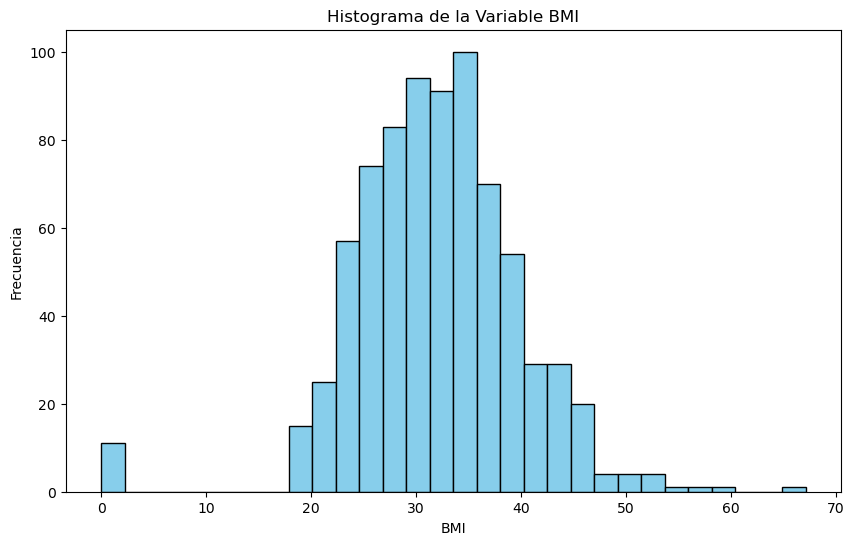

In [105]:
# Crear el histograma de la variable BMI
plt.figure(figsize=(10, 6))
plt.hist(df_diabetes['BMI'].dropna(), bins=30, color='skyblue', edgecolor='black')

# Personalizo el Grafico con el titulos y las labels 
plt.title('Histograma de la Variable BMI')
plt.xlabel('BMI')
plt.ylabel('Frecuencia')

#Se muestra el grafico por Consola 
plt.show()


##### **Objetivo 9**
Se pueden ver algun valor extrano en la distribución de la variable BMI?
Realizar un boxplot para corroborar esto.

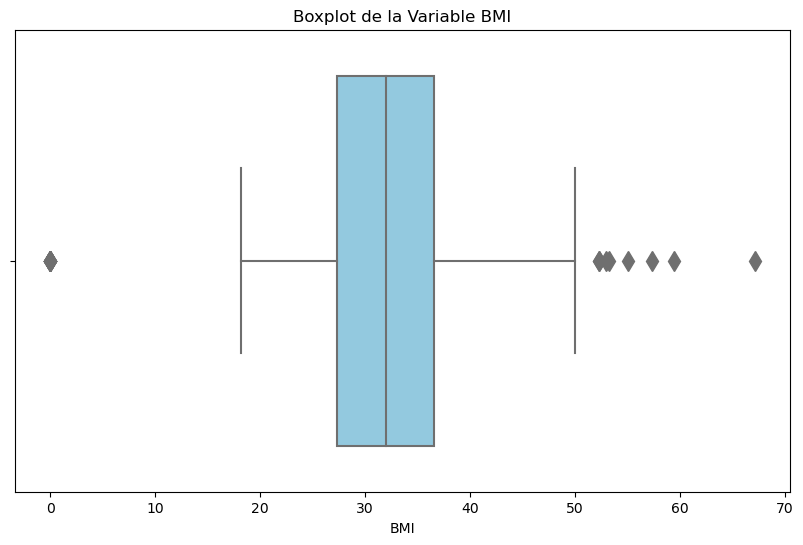

Valores atípicos de BMI con frecuencia:
0.0     11
52.3     2
53.2     1
55.0     1
67.1     1
52.9     1
59.4     1
57.3     1
Name: BMI, dtype: int64
Cantidad total de valores atípicos: 19


In [91]:
#Objetetivo 9 Alternativa 1(Hice 2 alternativas de codigo de como obtener los mismos resultados )


# Crear el boxplot de la variable BMI
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_diabetes['BMI'], color='skyblue', fliersize=10)



# Personalizo el Grafico con el titulos y las labels 
plt.title('Boxplot de la Variable BMI')
plt.xlabel('BMI')

#Se muestra el grafico por Consola
plt.show()


# Calcular los cuartiles y IQR(rango intercuartíL) para usar de referencia en el calculo de evalores atipicos 
Q1 = df_diabetes['BMI'].quantile(0.25)
Q3 = df_diabetes['BMI'].quantile(0.75)
IQR = Q3 - Q


# Defino los límites para los valores atípicos ( que esten por fuera de la caja)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


# Filtrar los valores atípicos
outliers = df_diabetes[(df_diabetes['BMI'] < lower_bound) | (df_diabetes['BMI'] > upper_bound)]


# Contar la cantidad de valores atípicos
outliers_count = outliers['BMI'].value_counts()


# Se muestra por consola el resultado de la cantidad de valores atipicos por frecuencia 
print("Valores atípicos de BMI con frecuencia:")
print(outliers_count)

# Se muestra por consola la cantidad total de valores atipicos de la variable BMI(Analizado por Boxplot)
print(f"Cantidad total de valores atípicos: {len(outliers)}")



Valor Mediana: 32.00
Quartiles (Q1 - Q3): 18.20 - 50.00
Límites de los Whiskers: Inferior: 0.00 - Superior: 0.00
Valores atípicos:
[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  53.2 55.  67.1
 52.3 52.3 52.9 59.4 57.3]


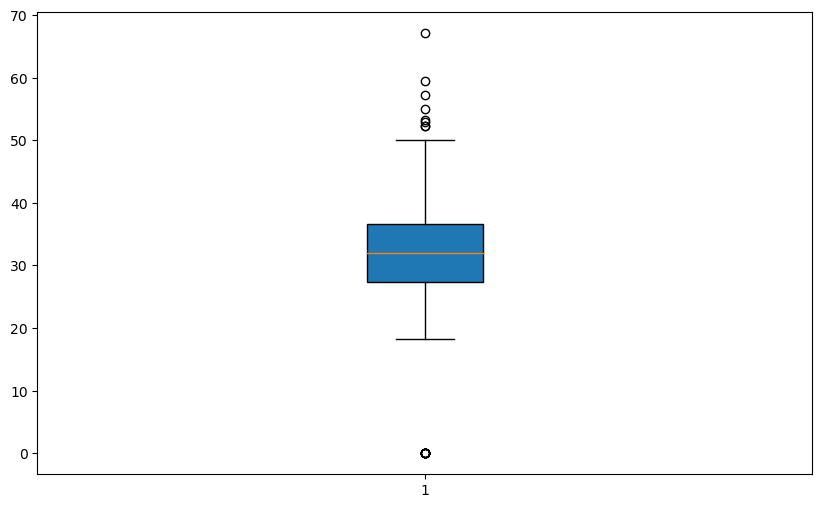

In [122]:
#Alternativa 2

# Crear el boxplot de la variable BMI
plt.figure(figsize=(10, 6))
bxplot = plt.boxplot(df_diabetes['BMI'], patch_artist=True)


# Obtener los datos del boxplot
whiskers = [line.get_ydata() for line in bxplot['whiskers']]
caps = [line.get_ydata() for line in bxplot['caps']]
medians = [line.get_ydata()[1] for line in bxplot['medians']]
fliers = [flier.get_ydata() for flier in bxplot['fliers']]


# Extraer cuartiles y whiskers
Q1 = whiskers[0][1]  # Primer cuartil
Q3 = whiskers[1][1]  # Tercer cuartil
lower_whisker = caps[0][0]  # Límite inferior del whisker
upper_whisker = caps[1][0]  # Límite superior del whisker


# Calcular el IQR
IQR = Q3 - Q1

outliers = bxplot["fliers"][0].get_ydata()


print(f"Valor Mediana: {medians[0]:.2f}")
print(f"Quartiles (Q1 - Q3): {Q1:.2f} - {Q3:.2f}")
print(f"Límites de los Whiskers: Inferior: {low_whiskers:.2f} - Superior: {up_whiskers:.2f}")
print(f"Valores atípicos:\n{outliers}")




##### **Objetivo 10**
Filtrar el dataset para eliminar los valores que consideremos atípicos de la variable BMI.

In [145]:
# Filtrar el DataFrame para eliminar los valores atípicos de la variable BMI
df_diabetes_filtrado = df_diabetes[(df_diabetes['BMI'] >= lower_whisker) & (df_diabetes['BMI'] <= upper_whisker)]



# Mostrar la cantidad total de registros antes y después de eliminar los atípicos
original_count = len(df_diabetes)
filtered_count = len(df_diabetes_filtrado)


# Creo en un dataframe el summary del filtrado 
df_summary = pd.DataFrame({
    'Estado': ['Antes del Filtrado', 'Después del Filtrado'],
    'Cantidad Total de Registros': [original_count, filtered_count]
})


#se muetsra el nuevo dataframe filtrado 
print("\nResumen de registros:")
print(df_summary)

df_diabetes_filtrado





Resumen de registros:
                 Estado  Cantidad Total de Registros
0    Antes del Filtrado                          768
1  Después del Filtrado                          749


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Rango_Edad
0,6,148,72,35,0,33.6,0.627,50,1,C
1,1,85,66,29,0,26.6,0.351,31,0,B
2,8,183,64,0,0,23.3,0.672,32,1,B
3,1,89,66,23,94,28.1,0.167,21,0,A
4,0,137,40,35,168,43.1,2.288,33,1,B
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,C
764,2,122,70,27,0,36.8,0.340,27,0,A
765,5,121,72,23,112,26.2,0.245,30,0,A
766,1,126,60,0,0,30.1,0.349,47,1,C


##### **Objetivo 11**

Hacer un boxplot de la distribución de la "Glucosa" segun el tipo de paciente de la variable "Outcome". Es decir que hay que visualizar un boxplot de la variable "Glucosa" por cada categoria de la variable "Outcome".

Que podemos observar?

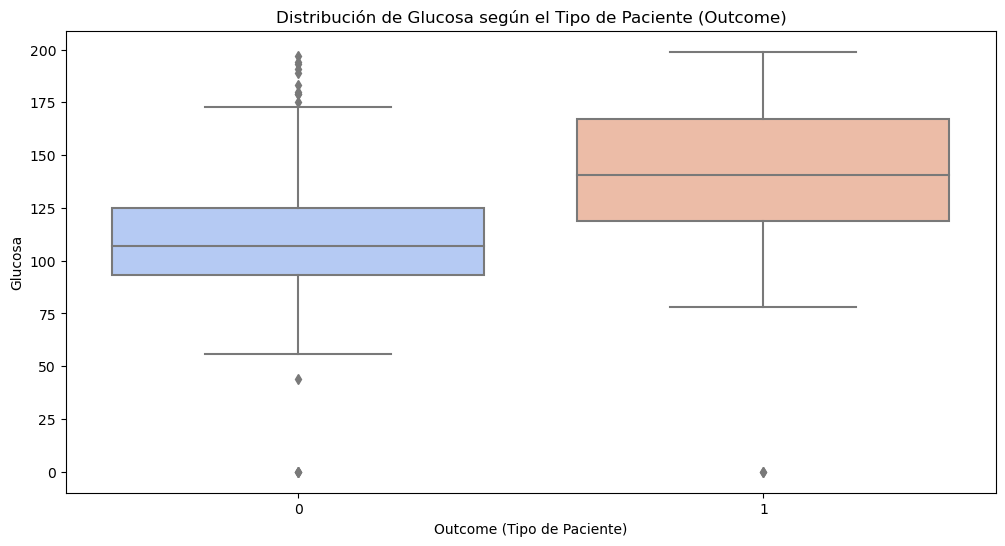

In [148]:
# Crear el boxplot de la variable Glucosa según el tipo de paciente (Outcome)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Outcome', y='Glucose', data=df_diabetes_filtrado, palette='coolwarm')

# Personalizo el Titulo y los Labels 
plt.title('Distribución de Glucosa según el Tipo de Paciente (Outcome)')
plt.xlabel('Outcome (Tipo de Paciente)')
plt.ylabel('Glucosa')

# Grafico  
plt.show()



Conclusiones:



Distribución de Valores Atípicos en Pacientes (Tipo 0 no diabeticos ):

Para el grupo de pacientes del Tipo 0(No Diabeticos) se observa una distribución de glucosa que presenta una mayor cantidad de valores atípicos (outliers). Esto indica una mayor variabilidad y dispersión en los niveles de glucosa en comparación con el grupo de pacientes del Tipo 1(Diabeticos)

La mediana de los niveles de glucosa para el grupo de no diabeticos  se encuentra en niveles más bajos.Esto indica que en promedio los pacientes de este grupo tienen niveles de glucosa más bajos.




Distribución en Pacientes (Tipo 1 diabeticos):

El grupo de pacientes del Tipo 1 muestra menor cantidad de valores atípicos, lo que indica que los datos están menos dispersos y más concentrados cerca de la mediana.

Sin embargo, los niveles de glucosa en el grupo Tipo 1(Diabeticos) son considerablemente más elevados en comparación con el grupo Tipo 0(No Diabeticos) tanto en sus cuartiles como en la mediana.Esto sugiere que en promedio los pacientes de este grupo tienen niveles de glucosa más altos.


##### **Objetivo 12**
Hacer un Scatterplot donde se muestre como se distribuye la Glucosa y la Presión sanguínea según el tipo de paciente.

Se puede ver alguna relación? Cuál?

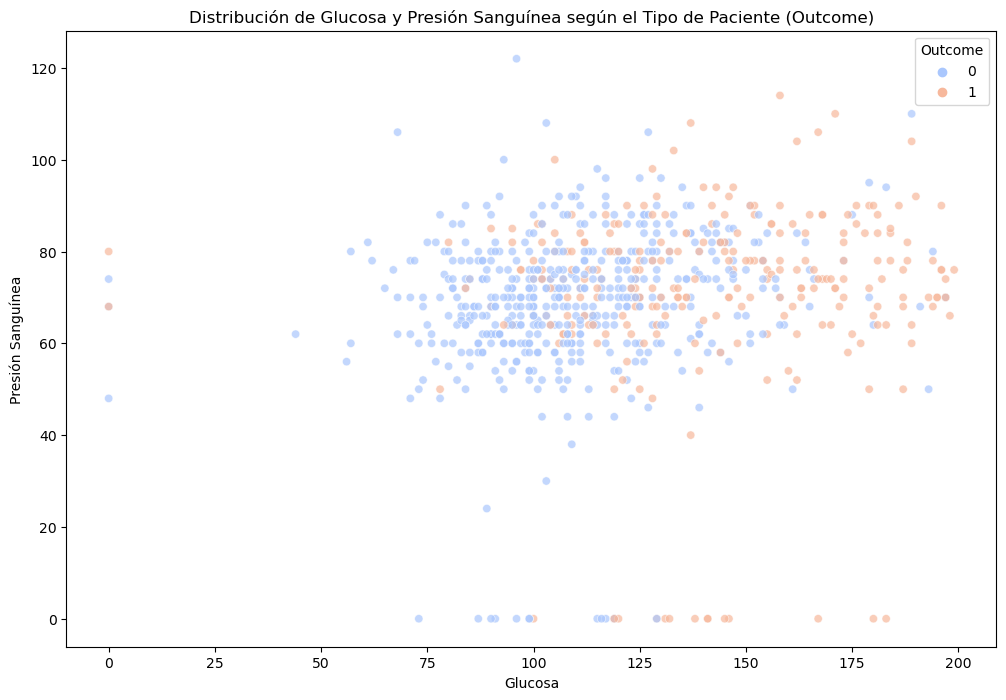

In [149]:
# Crear el scatterplot de Glucosa vs Presión Sanguínea según el tipo de paciente (Outcome)
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Glucose', y='BloodPressure', hue='Outcome', data=df_diabetes_filtrado, palette='coolwarm', alpha=0.7)



# Títulos y etiquetas
plt.title('Distribución de Glucosa y Presión Sanguínea según el Tipo de Paciente (Outcome)')
plt.xlabel('Glucosa')
plt.ylabel('Presión Sanguínea')


# Mostrar la leyenda
plt.legend(title='Outcome')


#Gráfico
plt.show()



Conclusiones:


El scatterplot muestra una clara separacion entre los dos grupos de pacientes, identificados por el Outcome (0 y 1). A pesar de algunos valores atípicos (outliers) la separación entre los dos grupos es evidente.

Los pacientes con Outcome 0 (No diabéticos) tienden a agruparse en áreas con niveles de glucosa y presión sanguínea más bajos y los pacientes con Outcome 1 (Diabéticos) se concentran en áreas con niveles de glucosa y presión sanguínea más altos.Lo que indica una diferencia significativa en las características de ambos grupos de la variable Outcome



##### **Objetivo 13**
Crear una nueva variable de rangos de edades de tipo texto/ string dividiendolo de la siguiente manera:

- Primer rango de edad menor a 30 años
- Segundo rango de edad entre 30 y 40 años.
- Tercer rango de edad mayor a 40 años

In [152]:
#Creo la nueva columna 'Rango_Edad' con etiquetas 'A', 'B', y 'C'
df_diabetes_filtrado['Rango_Edad'] = pd.cut(
    df_diabetes['Age'],
    bins=[-float('inf'), 30, 40, float('inf')],
    labels=['A', 'B', 'C']
)

# Mostrar en consola el head() del  Df Filtrado y con la nueva columna Agregada(Feature clasificatorio de edad) 
df_diabetes_filtrado.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Rango_Edad
0,6,148,72,35,0,33.6,0.627,50,1,C
1,1,85,66,29,0,26.6,0.351,31,0,B
2,8,183,64,0,0,23.3,0.672,32,1,B
3,1,89,66,23,94,28.1,0.167,21,0,A
4,0,137,40,35,168,43.1,2.288,33,1,B


##### **Objetivo 14**
Hacer un count plot que cuente la cantidad de pacientes diabéticos y no diabéticos por rango etario.

Podemos extraer alguna conclusión al respecto? Cuál?

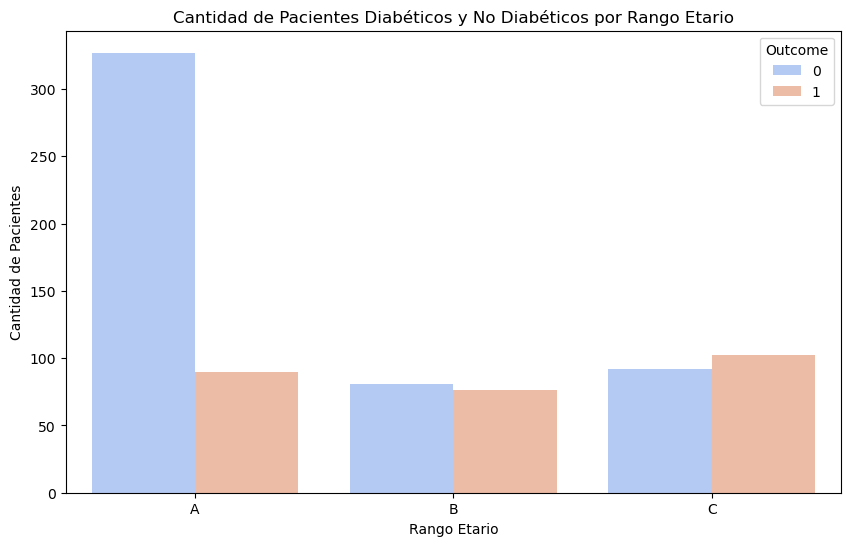

In [97]:
# Creo el countplot de la variable 'Rango_Edad' y 'Outcome'
plt.figure(figsize=(10, 6))
sns.countplot(data=df_diabetes, x='Rango_Edad', hue='Outcome', palette='coolwarm')



#Configuracion del grafico 
plt.title('Cantidad de Pacientes Diabéticos y No Diabéticos por Rango Etario')
plt.xlabel('Rango Etario')
plt.ylabel('Cantidad de Pacientes')


# Gráfico
plt.show()


Conclusion:

Diferencias por Rango Etario:

Para los rangos de edad B (30-40 años) y C (mayores de 40 años) no se observan diferencias significativas entre pacientes diabéticos (Tipo 1) y no diabéticos (Tipo 0). Ambos grupos parecen estar igualmente distribuidos en estos rangos etarios.

Sin embargo en el rango A (menores de 30 años) se observa una mayor proporción de pacientes no diabéticos en comparación con los diabéticos. Esto sugiere que (para este conjunto de datos) hay más pacientes no diabéticos en el grupo de menor edad.



Posibles Interpretaciones:

El hecho de que haya más pacientes no diabéticos en el rango A puede indicar que la diabetes se diagnostica más frecuentemente en edades mayores.

Es posible que la diabetes se detecte con mayor frecuencia o se desarrolle más tarde en la vida, según este conjunto de datos de 768 muestras filtrado

